In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/codebasics/py/master/ML/FeatureEngineering/1_outliers/Exercise/AB_NYC_2019.csv')

In [5]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.drop(['id','name','host_id','host_name'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               38843 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(

In [8]:
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Latitudes range from -90 to 90, and longitudes range from -180 to 80 for USA

In [14]:
print(df['latitude'].max(),df['latitude'].min())
print(df['longitude'].max(),df['longitude'].min())

print(df['price'].min())

40.913059999999994 40.499790000000004
-73.71299 -74.24441999999999
0


In [40]:
print(df['price'].quantile(0.95))

355.0


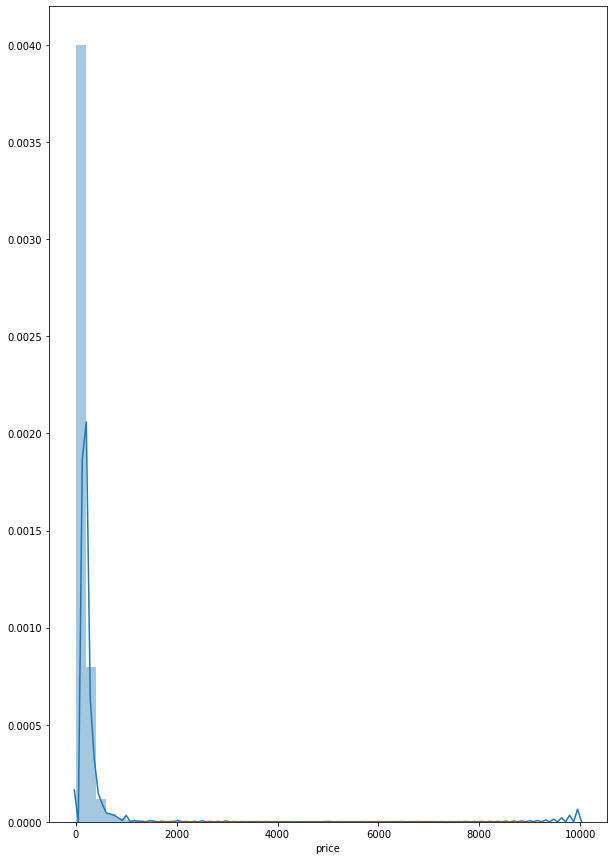

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
sns.distplot(df['price'])
plt.show()

In [41]:
min_thresh,max_thresh=df.price.quantile([0.05,0.95])

In [42]:
df_new=df[(df.price>min_thresh)&(df.price<max_thresh)]

In [43]:
df_new.shape

(43631, 12)

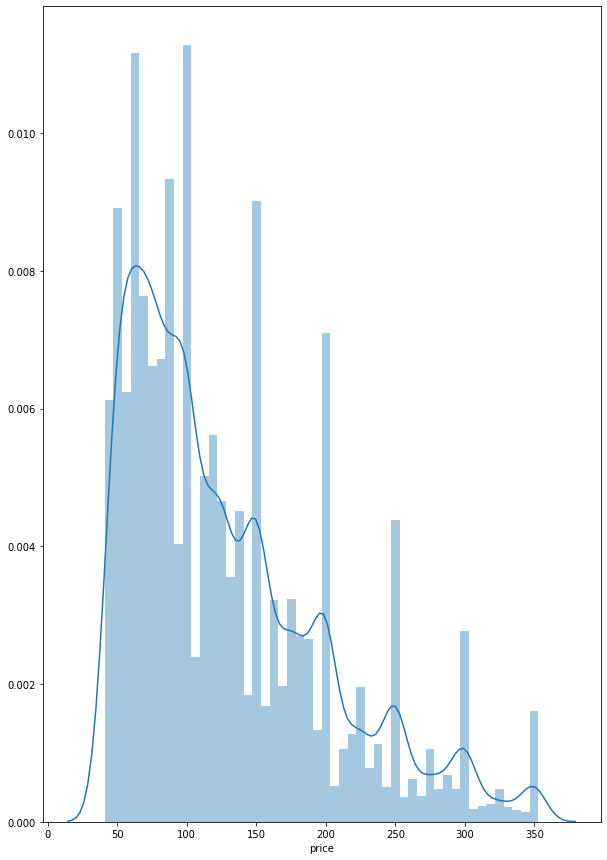

In [44]:
plt.figure(figsize=(10,15))
sns.distplot(df_new['price'])
plt.show()

In [48]:
df_new['price'].sample(10)

18651     75
41124     50
13514    125
37820    150
8281     250
34943    250
7809      85
14909    135
11173     83
3427     115
Name: price, dtype: int64